Import packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from os.path import exists
import os



In [6]:
# Model size and discretization
xsize = 20 # size of the model [m]
ysize = 100

dx = .25 # discretization
dy = .25
dz = .25

nx = int(xsize / dx) # number of cell
ny = int(ysize / dy)

# Frequency
freq = 25e6 # MHz
time_window = 1.5e-6

In [9]:
folder = 'GenerateModels/'
pathinput = 'bedrock_model.in'
pathmaterials = 'bedrock_model_materials.txt'

filename = open(pathinput, 'w')
filname_materials = open(pathmaterials, 'w')

# Define materials
#mat_helicopter = []
mat_freespace = [1., 0., 1., 3.] # gprMax build in [eps_r ; sigma ; mu_r ; vel]
mat_glacier = [3.2, 5.e-8, 1., 0.1]  # Church et al., 2020
mat_bedrock = [5., 0.01, 1, 1.3] # granite Annan (1999)

# generate file with material properties
filname_materials.write('#material: '+str(mat_freespace[0])+' '+str(mat_freespace[1])+' '+str(mat_freespace[2])+' '+str(mat_freespace[3])+' freespace\n')
filname_materials.write('#material: '+str(mat_glacier[0])+' '+str(mat_glacier[1])+' '+str(mat_glacier[2])+' '+str(mat_glacier[3])+' glacier\n')
filname_materials.write('#material: '+str(mat_bedrock[0])+' '+str(mat_bedrock[1])+' '+str(mat_bedrock[2])+' '+str(mat_bedrock[3])+' bedrock\n')


34

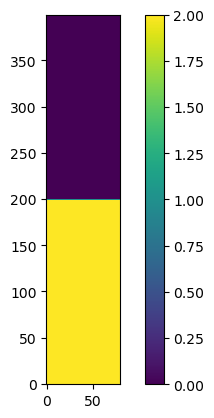

In [63]:
model = np.zeros((ny, nx))
model[round(ny/2):ny,:] = 1

r = .8*xsize
center = [0, round(nx/2)]
for i in range(0, ny):
    for j in range(0, nx):
        rij = np.sqrt(((j - round(nx/2))*dx)**2 + ((i - 0)*dy)**2)
        if rij > r and i > round(ny/2):
            model[i, j] = 2
            # Plot the model

model = np.flip(model, axis=0)
plt.imshow(model)
#plt.scatter(transy/ysize*ny, transx/xsize*nx)
# plt.scatter(receiy/ysize*ny, receix/xsize*nx)
ax = plt.gca()
ax.invert_yaxis()
plt.colorbar()
plt.show()


In [52]:
transx = round(xsize/2+.5)
transy = round(ysize/3)
receix = round(xsize/2+.5)
receiy = round(ysize*2/3)

10
33
10
67


In [54]:
# Rehape the model for gprMax compulsory third dimension
model = np.reshape(model, (1, nx, ny))

# generate h5 file
pathh5 = 'bedrock.h5'
if exists(pathh5) == True:
    os.remove(pathh5)

hdf = h5py.File(pathh5, 'w')
modelh5 = hdf.create_dataset(name = 'data', data = model)
hdf.attrs['dx_dy_dz'] = [dx, dy, dz]

In [55]:

# Generate .in file
filename.write('#title: bedrock_model \n')
filename.write('#domain: '+str(xsize)+' '+str(ysize)+' '+str(dz)+' \n')
filename.write('#dx_dy_dz: '+str(dx)+' '+str(dy)+' '+str(dz)+' \n')
filename.write('#time_window: '+ str(time_window)+'\n')
filename.write('#waveform: ricker 1 '+ str(freq)+ ' my_ricker\n')
filename.write('#hertzian_dipole: z '+str(transx)+' '+str(transy)+' 0 my_ricker\n')
filename.write('#rx: '+str(receix)+' '+str(receiy)+' 0\n')
#filename.write('#src_steps: 0.5 0 0\n')
#filename.write('#rx_steps: 0.5 0 0\n')
filename.write('#geometry_objects_read: 0 0 0 '+pathh5+' '+folder+pathmaterials)

83